#### Structure
* [MNIST Dataset](#dataset_topic)
* [Model development](#model_topic)
* [Model Evaluation](#evaluation_topic)
* [Model Optimization](#optimization_topic)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
! pip install tensorflow

## 1 - Dataset MNIST
<a id='dataset_topic'></a>

In [90]:
from keras.datasets import mnist


In [91]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


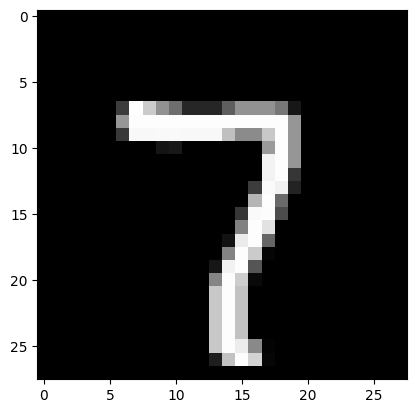

image class = 7


In [92]:
ind = 288

plt.imshow(x_train[ind], cmap = 'gray')
plt.show()
print(f"image class = {y_train[ind]}")

In [93]:
print(x_train[ind])
print(f"\nShape of train sample: {x_train[ind].shape}")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  60 255 203 146 110  38  38  38  94 146 146 146
  119  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 151 253 253 253 253 253 253 253 253 25

In [94]:
# Reshape images into vectors

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)


In [95]:
# dataset's data type change
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [96]:
# Data normalization with min-max normalization technique 
x_train /= 255
x_test /= 255

In [97]:
! pip install scikit-learn

## 2 - Model
<a id='model_topic'></a>

In [98]:
# import kNN classifier
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier

In [99]:
# Init model
algorithm = 'brute'
metric = 'euclidean'
k = 3      

model = kNNClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)

In [100]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=3)

In [101]:
ind = 3

predication_sample = model.predict(x_test[3].reshape(1, -1))

In [102]:
# Prediction accuracy for 1 sample

predication_sample[0] == y_test[ind]

True

In [103]:
y_test_pred = model.predict(x_test)




In [104]:
correct_preds = 0
for ind, el in enumerate(y_test_pred):
    if el == y_test[ind]:
        correct_preds += 1

print(f"test dataset accuracy is: {correct_preds / len(x_test)}")

test dataset accuracy is: 0.9705


## Model Evaluation
<a id="evaluation_topic"></a>

In [105]:
# Evaluation
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [106]:
eucl_precision, eucl_recall, eucl_fscore, _ = precision_recall_fscore_support(y_test, y_test_pred)
labels = np.sort(np.unique(y_test))
conf_mtrx = confusion_matrix(y_test, y_test_pred, labels=labels)
eucl_accuracy_score = conf_mtrx.diagonal()/conf_mtrx.sum(axis=1)

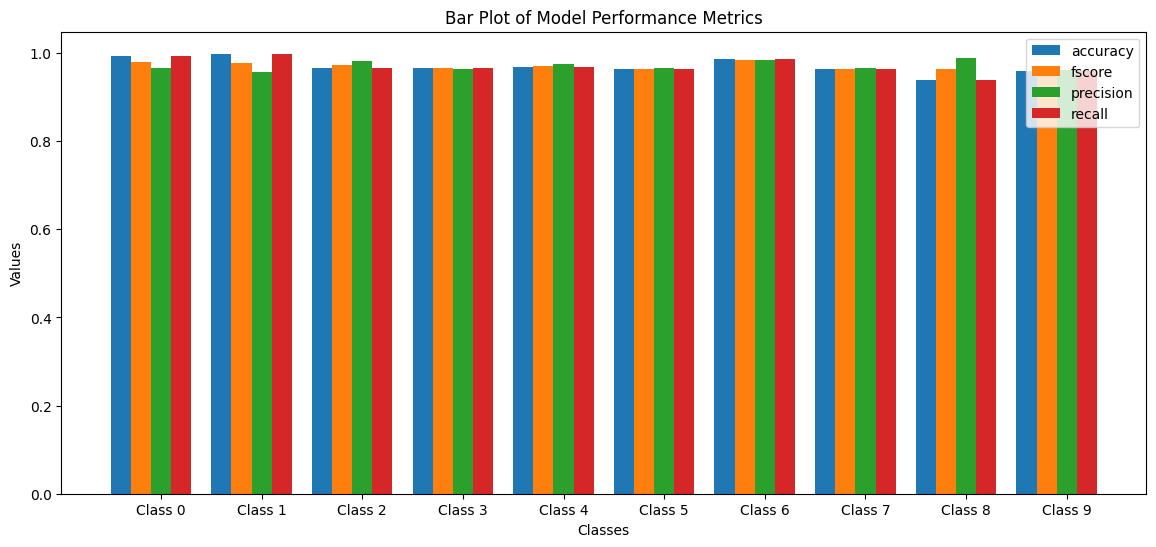

In [107]:
num_arrays = 4

num_elements = len(eucl_accuracy_score)


data = [
    eucl_accuracy_score,
    eucl_fscore,
    eucl_precision,
    eucl_recall
]

metric_names = [
    'accuracy',
    'fscore',
    'precision', 
    'recall',
]


plt.figure(figsize=(14, 6)) 

indices = np.arange(num_elements)

bar_width = 0.8 / num_arrays  

for i in range(num_arrays):
    plt.bar(indices + i * bar_width, data[i], width=bar_width, label=metric_names[i])

# General layout
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Bar Plot of Model Performance Metrics')

plt.xticks(indices + bar_width * (num_arrays / 2), ['Class {}'.format(i) for i in range(num_elements)])

plt.legend()
plt.show()


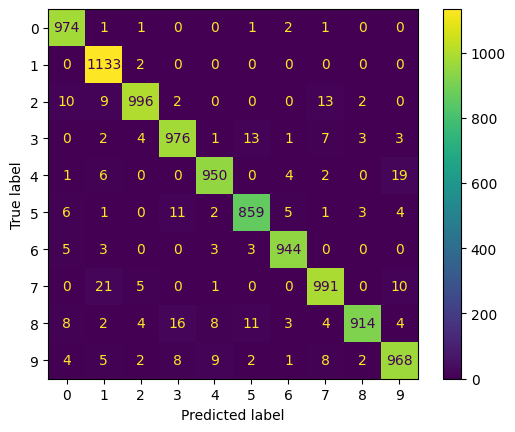

In [108]:
# Plot confusion matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix = conf_mtrx, display_labels = labels)
cm_plot.plot()
plt.show()

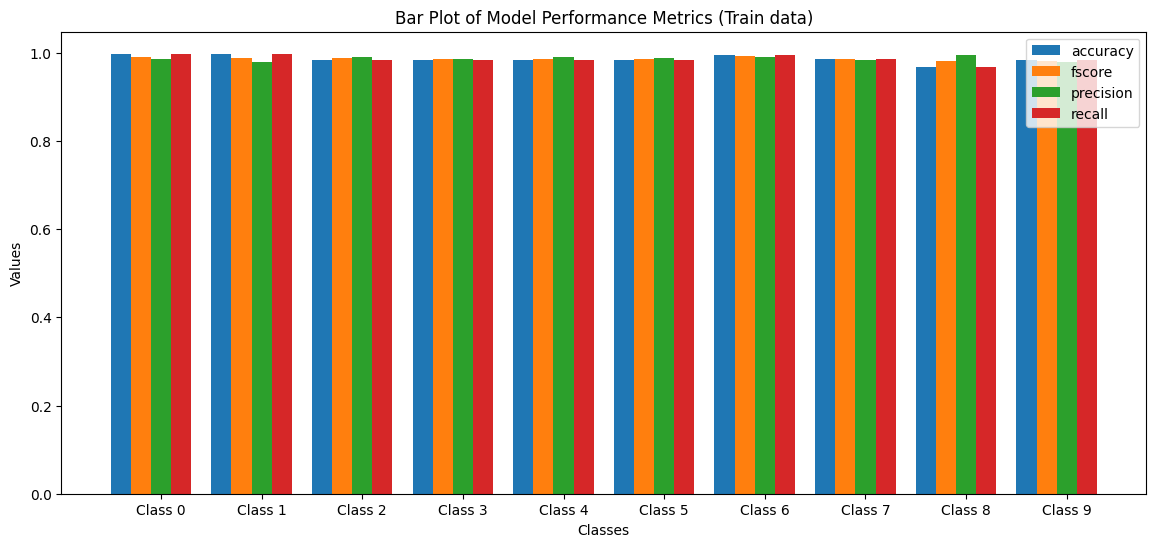

In [109]:
# Predict on train data
y_train_pred = model.predict(x_train)

# Load performance metrics
eucl_train_precision, eucl_train_recall, eucl_train_fscore, _ = precision_recall_fscore_support(y_train, y_train_pred)
conf_train_mtrx = confusion_matrix(y_train, y_train_pred, labels=labels)
eucl_train_accuracy_score = conf_train_mtrx.diagonal()/conf_train_mtrx.sum(axis=1)

# Plot metrics

train_metric_data = [
    eucl_train_accuracy_score,
    eucl_train_fscore,
    eucl_train_precision,
    eucl_train_recall
]


plt.figure(figsize=(14, 6)) 

indices = np.arange(num_elements)

bar_width = 0.8 / num_arrays  

for i in range(num_arrays):
    plt.bar(indices + i * bar_width, train_metric_data[i], width=bar_width, label=metric_names[i])

# General layout
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Bar Plot of Model Performance Metrics (Train data)')

plt.xticks(indices + bar_width * (num_arrays / 2), ['Class {}'.format(i) for i in range(num_elements)])

plt.legend()
plt.show()

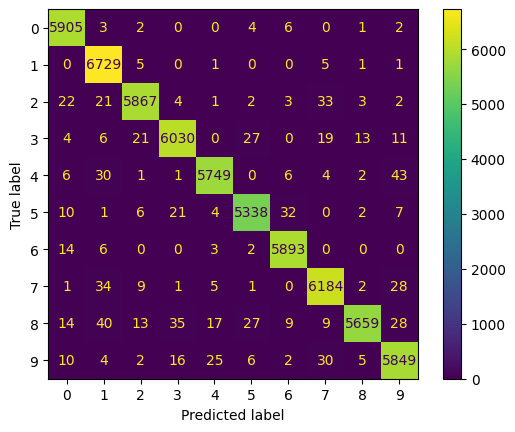

In [110]:
# Plot confusion matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix = conf_train_mtrx, display_labels = labels)
cm_plot.plot()
plt.show()

##### Based on these two confusion matrix we can accept model performs well on both datasets, but much better on train dataset what we can see on off-diagonal values

## 4 - Model Optimization
<a id="optimization_topic"></a>

##### Distance optimization

Euclidian Distance Metric is known as common metric for image recognition. On the other hand public data says that Manhattan Distance Metric can be also applicable to that case which is argumented by following consideration:

    Manhattan Distance Metric performs well for high dimensinal data where images are quit high dimensional



In [111]:
# Manhattan Distance Metric usage
algorithm = 'brute'
metric = 'manhattan'
k = 3      

model = kNNClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)

In [112]:
# fit model

model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=3)

In [113]:
# Predictions on test data
y_test_pred = model.predict(x_test)

In [114]:
# Load performance metrics
manhttn_precision, manhttn_recall, manhttn_fscore, _ = precision_recall_fscore_support(y_test, y_test_pred)
manhttn_conf_mtrx = confusion_matrix(y_test, y_test_pred, labels=labels)
manhttn_accuracy_score = manhttn_conf_mtrx.diagonal()/manhttn_conf_mtrx.sum(axis=1)

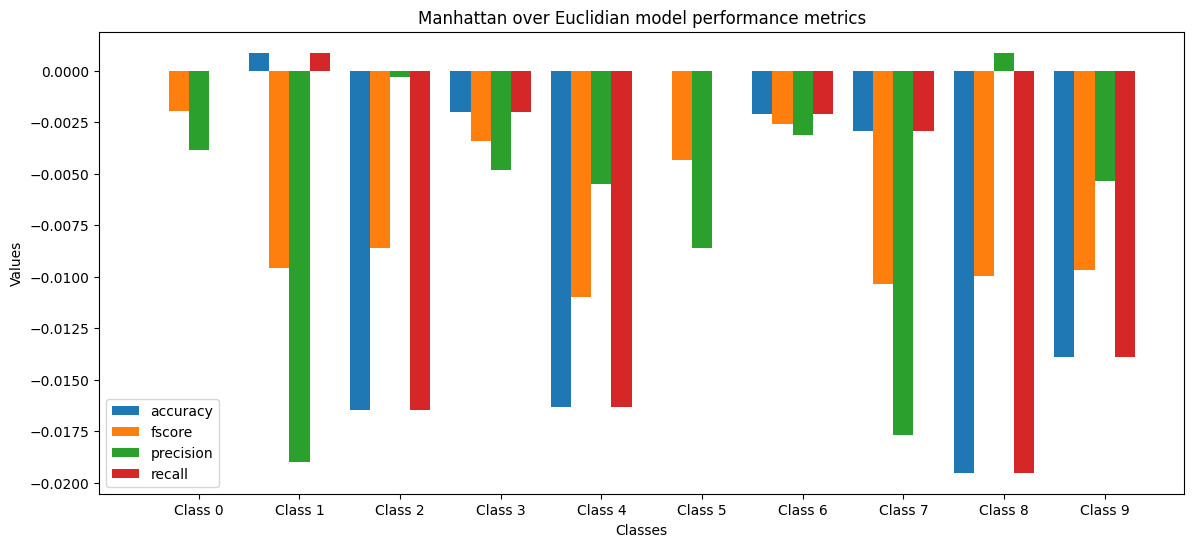

In [115]:
# Plot performance metrics difference for Euclidian and Manhattan distance metrics
metric_names = [
    'accuracy',
    'fscore',
    'precision', 
    'recall',
]

train_metric_data = [
    [k - eucl_accuracy_score[ind] for ind,k in enumerate(manhttn_accuracy_score)],
    [k - eucl_fscore[ind] for ind,k in enumerate(manhttn_fscore)],
    [k - eucl_precision[ind] for ind,k in enumerate(manhttn_precision)],
    [k - eucl_recall[ind] for ind,k in enumerate(manhttn_recall)],
]


plt.figure(figsize=(14, 6)) 

indices = np.arange(num_elements)

bar_width = 0.8 / num_arrays  

for i in range(num_arrays):
    plt.bar(indices + i * bar_width, train_metric_data[i], width=bar_width, label=metric_names[i])

# General layout
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Manhattan over Euclidian model performance metrics')

plt.xticks(indices + bar_width * (num_arrays / 2), ['Class {}'.format(i) for i in range(num_elements)])

plt.legend()
plt.show()

##### As we can see model based on Manhattan Distance Metric has poorer performance compared to one based on Euclidian Distance Metric 
##### Want to discuss :)

##### Cosine Similarity Distance Metric

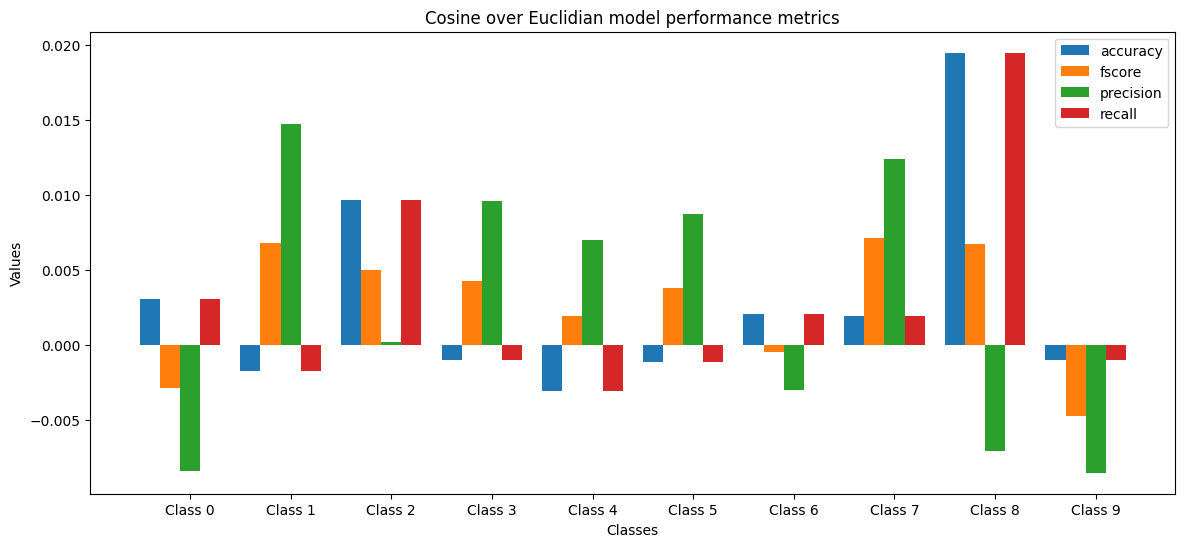

In [116]:
algorithm = 'brute'
metric = 'cosine'
k = 3      

model = kNNClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

cosine_precision, cosine_recall, cosine_fscore, _ = precision_recall_fscore_support(y_test, y_test_pred)
cosine_conf_mtrx = confusion_matrix(y_test, y_test_pred, labels=labels)
cosine_accuracy_score = cosine_conf_mtrx.diagonal()/cosine_conf_mtrx.sum(axis=1)

metric_names = [
    'accuracy',
    'fscore',
    'precision', 
    'recall',
]

train_metric_data = [
    [k - eucl_accuracy_score[ind] for ind,k in enumerate(cosine_accuracy_score)],
    [k - eucl_fscore[ind] for ind,k in enumerate(cosine_fscore)],
    [k - eucl_precision[ind] for ind,k in enumerate(cosine_precision)],
    [k - eucl_recall[ind] for ind,k in enumerate(cosine_recall)],
]


plt.figure(figsize=(14, 6)) 

indices = np.arange(num_elements)

bar_width = 0.8 / num_arrays  

for i in range(num_arrays):
    plt.bar(indices + i * bar_width, train_metric_data[i], width=bar_width, label=metric_names[i])

# General layout
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Cosine over Euclidian model performance metrics')

plt.xticks(indices + bar_width * (num_arrays / 2), ['Class {}'.format(i) for i in range(num_elements)])

plt.legend()
plt.show()

##### As we can observe Cosine Similarity distance metrics performs the best among all three used distance metrics. Intuitively it looks logical since Cosine Similarity used to find similarity between data points. 
#### Also would be very happy to hear your opinion!

used https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7

##### Optimization of k

In [117]:
train_precision = []
test_precision = []


for k in range(1, 10):

    # initialize model with new k value
    model = kNNClassifier(n_neighbors = k, algorithm = 'brute', metric = 'cosine')

    # fit model
    model.fit(x_train, y_train)

    # predict training subset
    y_train_pred = model.predict(x_train)

    # predict testing subset
    y_test_pred = model.predict(x_test)

    # calculate model's accuracy for training subset
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # save accuracy_train
    train_precision.append(accuracy_train)

    # calculate model's accuracy for testing subset, save the value
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # save accuracy_test
    test_precision.append(accuracy_test)

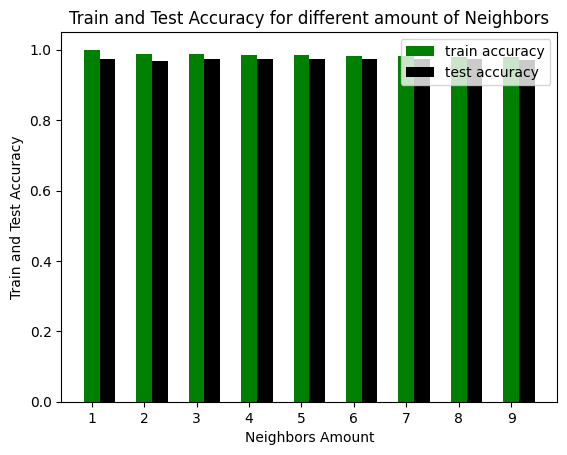

In [118]:

k = np.arange(1, 10, dtype=int)

bar_width = 0.3

indices = np.arange(len(k))

plt.bar(indices, train_precision, width=bar_width, label='train accuracy', color='green')
plt.bar(indices + bar_width, test_precision, width=bar_width, label='test accuracy', color='black')

plt.xlabel('Neighbors Amount')
plt.ylabel('Train and Test Accuracy')
plt.title('Train and Test Accuracy for different amount of Neighbors')
plt.xticks(ticks=indices, labels=k)  

plt.legend()

plt.show()
